#### Import Modules

In [149]:
from PIL import Image, ImageOps
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image
import glob, os
import math
from scipy import spatial
import random 

#### Function: Get a numpy array from an image file location

In [150]:
def load_image(source : str) -> np.ndarray:
    with Image.open(source) as im:
        im_arr = np.asarray(im)
    return im_arr

#### Load our main image

In [151]:

im_arr = load_image('C:/Users/User/Pictures/B2DBy.jpg')
image = Image.fromarray(im_arr)
image = ImageOps.grayscale(image)
image.show()

#### Store width and height of original image

In [152]:
width = im_arr.shape[0]
height = im_arr.shape[1]

#### Set the target resolution

In [153]:
target_res = (50, 50) ## Number of images to make up final image (width, height)

#### Create a template for mosaic
Index slice the image, using the step for rows and columns to divide the resolution

In [154]:
def resize_image(img : Image, size : tuple) -> np.ndarray:
    resz_img = ImageOps.fit(img, size, Image.ANTIALIAS, centering=(0.5, 0.5))
    return np.array(resz_img)
def grayscale_image(img: Image) -> np.ndarray:
    resz_img = ImageOps.grayscale(img)
    return np.array(resz_img)

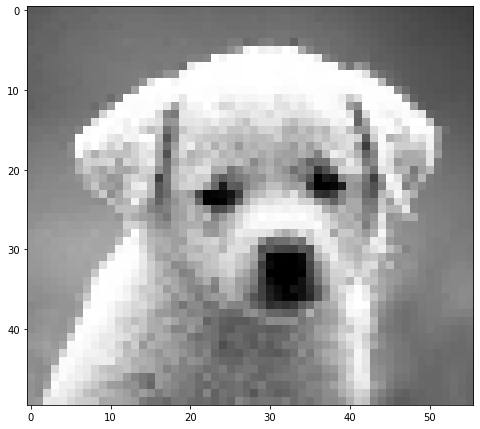

In [155]:
plt.figure(figsize=(8,8))
mos_template = im_arr[::(height//target_res[0]),::(height//target_res[1])]
plt.imshow(Image.fromarray(mos_template))
plt.show()

#### Number of images required to fill mosaic

In [156]:
mos_template[:,:, -1].size

2800

#### Create a list of all images as np arrays

In [157]:
images = []
from pathlib import Path

directory = 'C:/Users/User/Downloads/star wars episode I/star wars episode I'

files = Path(directory).glob('*')
for file in files:
    im = load_image(file)
    images.append(im)



#### Set mosiac tile size


In [158]:
mosaic_size = (30, 30) 
images = [resize_image(Image.fromarray(i), mosaic_size) for i in images]
len(images)

226

In [159]:

images = [grayscale_image(Image.fromarray(i)) for i in images]



#### Let's take a look at one of the mosaic images

In [160]:
Image.fromarray(images[55]).show()

#### Convert list to np array

In [161]:
images_array = np.asarray(images)
images_array.shape

(226, 30, 30)

#### Get mean of values for each image


In [162]:
image_values = np.apply_over_axes(np.mean, images_array, [1,2]).reshape(len(images))
image_values

array([  0.        ,   2.67333333,  20.71555556,   4.70555556,
        30.43444444,  27.48888889,  48.54      ,  50.45666667,
        50.81888889,  49.51222222,  81.49666667,  57.45555556,
        41.10111111,  30.13111111,  39.38111111,  38.48444444,
        60.14777778,  60.70777778,  43.36333333,  37.57777778,
        52.47666667,  46.01222222,  45.27555556,  23.25444444,
        27.82      ,  40.40666667,  24.26666667,  20.80666667,
        27.53444444,  33.58777778,  13.24111111,  24.40444444,
        10.36888889,  32.09      ,  13.11      ,  20.05333333,
        83.32444444,  73.61555556,  80.10666667,  72.96777778,
        40.68      ,  39.41      ,  58.07      ,  66.21111111,
        21.65888889,  41.35222222,  36.64      ,  36.61444444,
        28.88111111,  62.26666667,  71.03888889, 148.05222222,
       137.79555556, 199.54333333, 133.94111111,  47.31666667,
        53.51888889,  60.70888889, 114.93777778,  77.21555556,
       171.84777778,  99.59      ,  33.69222222,  84.45

#### Store the indices of best match images


In [163]:
image_idx = np.zeros(target_res, dtype=np.uint32)
differences = []

for i in range(target_res[0]):
    for j in range(target_res[1]):
        
        template = np.mean(mos_template[i, j])
        for n in image_values:
            differences.append(abs(template - n))
        index_min = np.argmin(differences)
    
        image_idx[i, j] = index_min
        differences.clear()



#### Loop through the best match indices, retrieve the matching image and add it to the canvas


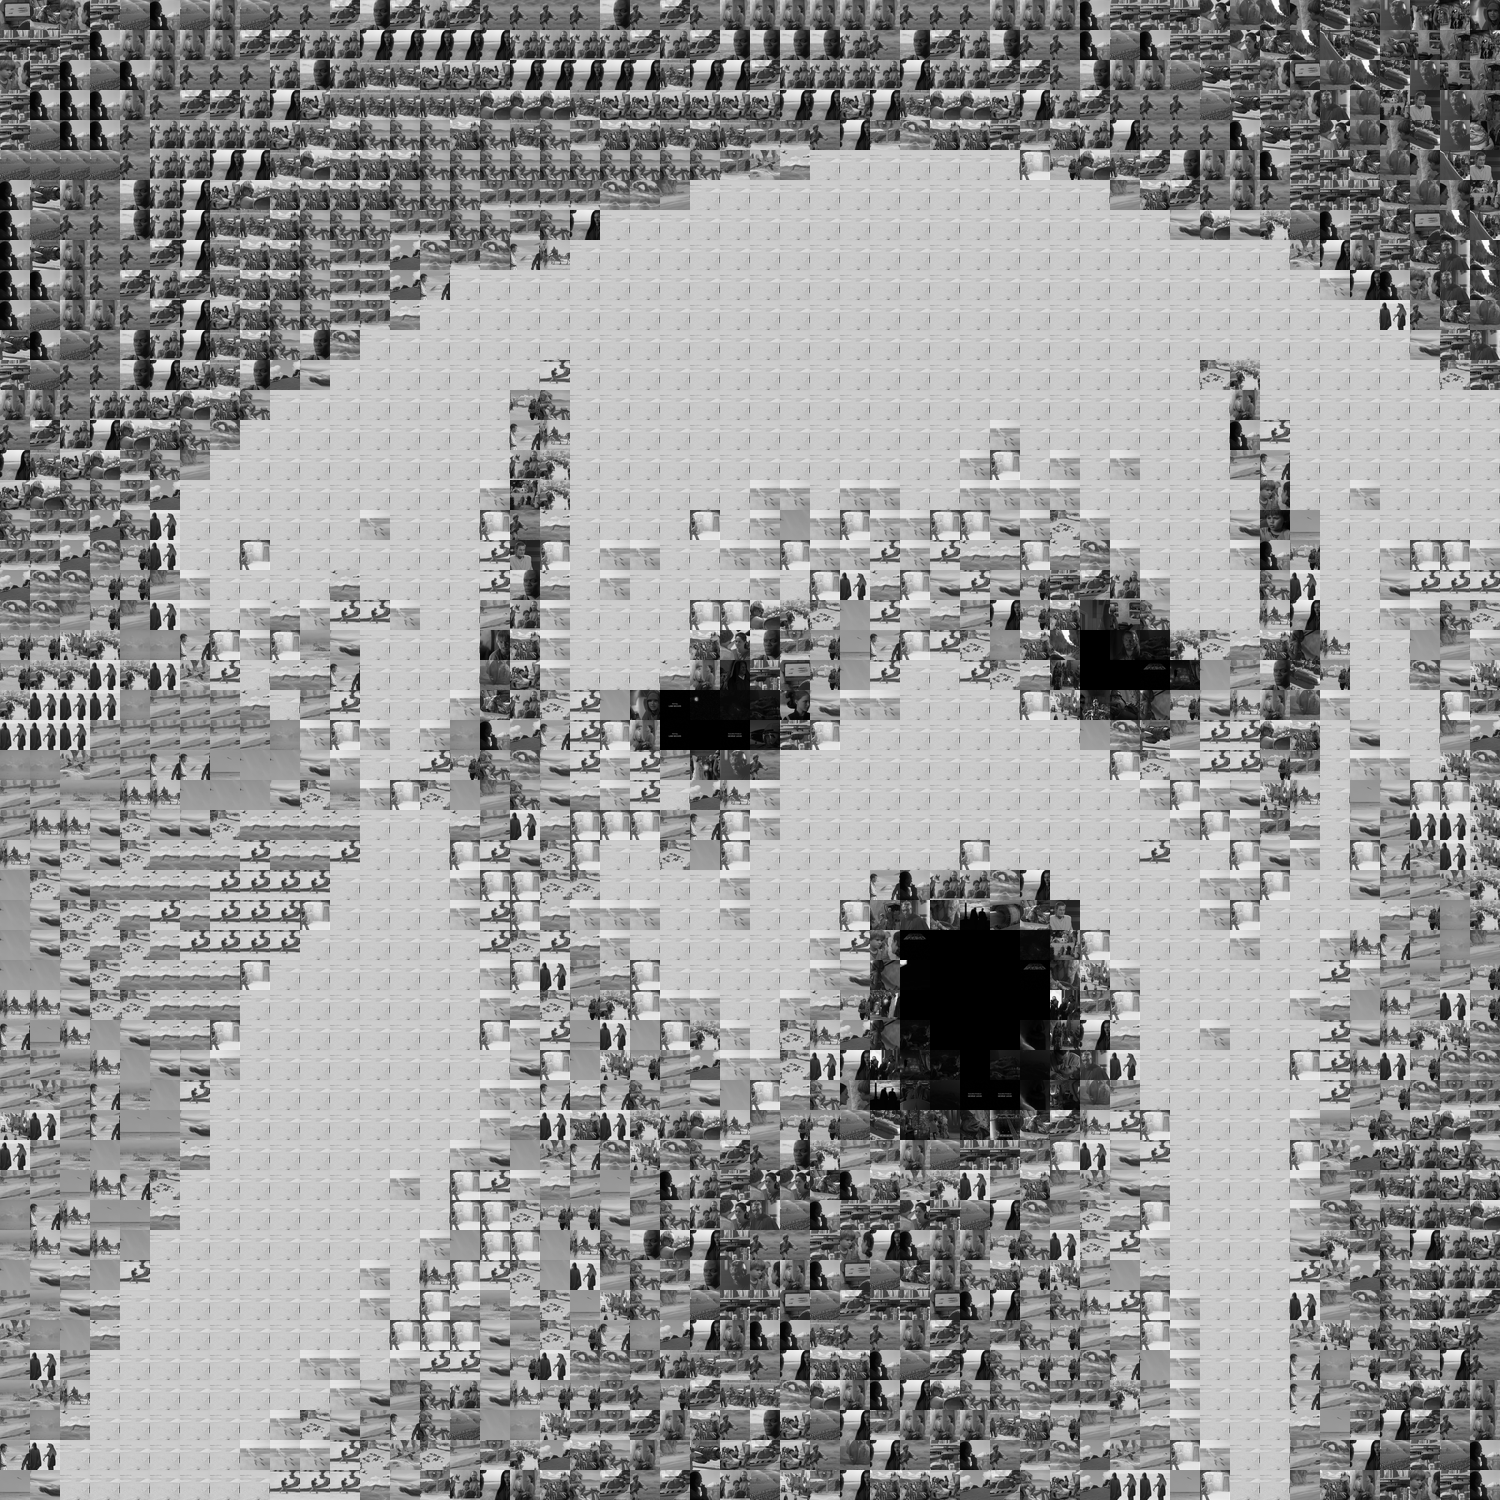

In [164]:
canvas = Image.new('L', (mosaic_size[0]*target_res[0], mosaic_size[1]*target_res[1]))

for i in range(target_res[0]):
    for j in range(target_res[1]):
        arr = images[image_idx[j, i]]
        x, y = i*mosaic_size[0], j*mosaic_size[1]
        im = Image.fromarray(arr)
        canvas.paste(im, (x,y))
        
canvas

#### Save output

In [19]:
# canvas.save('../Images/Exports/export.jpg')